In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import BeautifulSoup as soup
import time
import numpy as np
import pandas as pd
import bleach

In [18]:
dldict = {}

In [19]:
start = 0
num_page = 20
sc = 200
while sc==200 and start < num_page * 100:
    url = 'https://scholar.google.com/scholar?start=' + str(start) + '&q=%22Fast+Algorithms+for+Mining+Association+Rules%22&hl=en&num=' + str(num_page) + '&as_sdt=0,34'
    try:
        # Expect this to fail for pages we haven't downloaded yet, then catch and download
        dldict[url]
        sc = 200
    except KeyError:
        print 'Retrieving page', start/num_page
        page = requests.get(url)
        time.sleep(1)
        sc = page.status_code
        if sc==200:
            dldict[url] = page.text
    start += num_page

Retrieving page 0
Retrieving page 1
Retrieving page 2
Retrieving page 3
Retrieving page 4
Retrieving page 5
Retrieving page 6
Retrieving page 7
Retrieving page 8
Retrieving page 9
Retrieving page 10
Retrieving page 11
Retrieving page 12
Retrieving page 13
Retrieving page 14
Retrieving page 15
Retrieving page 16
Retrieving page 17
Retrieving page 18
Retrieving page 19
Retrieving page 20
Retrieving page 21
Retrieving page 22
Retrieving page 23
Retrieving page 24
Retrieving page 25
Retrieving page 26
Retrieving page 27
Retrieving page 28
Retrieving page 29
Retrieving page 30
Retrieving page 31
Retrieving page 32
Retrieving page 33
Retrieving page 34
Retrieving page 35
Retrieving page 36
Retrieving page 37
Retrieving page 38
Retrieving page 39
Retrieving page 40
Retrieving page 41
Retrieving page 42
Retrieving page 43
Retrieving page 44
Retrieving page 45
Retrieving page 46
Retrieving page 47
Retrieving page 48
Retrieving page 49
Retrieving page 50
Retrieving page 51
Retrieving page 52
Ret

In [90]:
template_years = map(lambda x: str(x), np.arange(1994,2016))

In [109]:
start = 0
num_page = 20
running = True
titles = []
abstracts = []
details = []
years = []
while running:
    url = 'https://scholar.google.com/scholar?start=' + str(start) + '&q=%22Fast+Algorithms+for+Mining+Association+Rules%22&hl=en&num=' + str(num_page) + '&as_sdt=0,34'
    try:
        page= dldict[url]
        s = soup.BeautifulSoup(page)
        papers = s.findAll('div', {'class': 'gs_ri'})
        for paper in papers:
            title = paper.find('a').text
            atxt = paper.find('div', {'class': 'gs_rs'})
            if atxt is not None:
                abstract = bleach.clean(atxt.text)
            else:
                abstract = ''
            detail = paper.find('div', {'class': 'gs_a'}).text
            y = -1
            for y in template_years:
                i = detail.find(y)
                if i != -1:
                    year = y
                    break
            titles.append(title)
            abstracts.append(abstract)
            details.append(detail)
            years.append(year)
        print 'For page', start/num_page, 'found', len(papers), 'papers'
    except KeyError:
        running = False
    start += num_page

For page 0 found 20 papers
For page 1 found 20 papers
For page 2 found 20 papers
For page 3 found 20 papers
For page 4 found 20 papers
For page 5 found 20 papers
For page 6 found 20 papers
For page 7 found 20 papers
For page 8 found 20 papers
For page 9 found 20 papers
For page 10 found 20 papers
For page 11 found 20 papers
For page 12 found 20 papers
For page 13 found 20 papers
For page 14 found 20 papers
For page 15 found 20 papers
For page 16 found 20 papers
For page 17 found 20 papers
For page 18 found 20 papers
For page 19 found 20 papers
For page 20 found 20 papers
For page 21 found 20 papers
For page 22 found 20 papers
For page 23 found 20 papers
For page 24 found 20 papers
For page 25 found 20 papers
For page 26 found 20 papers
For page 27 found 20 papers
For page 28 found 20 papers
For page 29 found 20 papers
For page 30 found 20 papers
For page 31 found 20 papers
For page 32 found 20 papers
For page 33 found 20 papers
For page 34 found 20 papers
For page 35 found 20 papers
Fo

In [92]:
df = pd.DataFrame({'title': titles, 'abstract': abstracts, 'details': details, 'year': years})

In [103]:
citations = df.groupby(['year'])['title'].count()

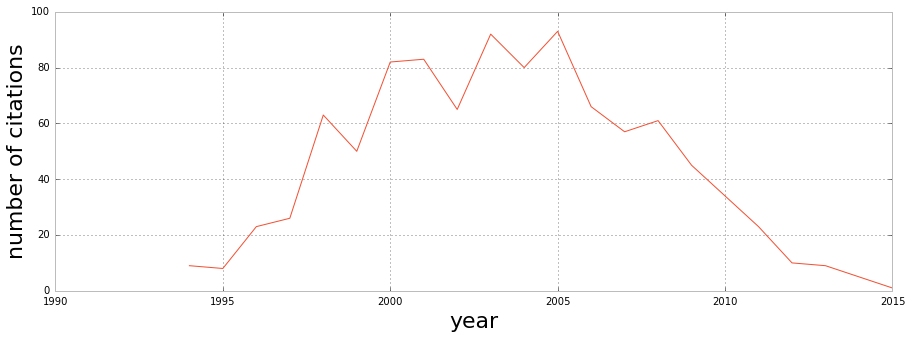

In [108]:
plt.figure(figsize=(15,5))
plt.plot(citations.index, citiations)
plt.xlabel('year', fontsize=22)
plt.ylabel('number of citations', fontsize=22)
plt.show()

In [81]:
# USED THIS CELL FOR DEBUGGING PURPOSES

#import IPython
#IPython.display.HTML(page)